### 폐암 유무 분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import os

c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
Data_set=pd.read_csv('./data/질병데이터.csv')
Data_set
# 폐암 데이터, x1~x16은 각 환자별 특징, y값은 폐암유무

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,y
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.48,1.88,1,0,0,0,1,0,0,0,0,0,0,0,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2,2.73,2.11,1,0,1,0,1,0,1,0,0,0,1,0,61,1
796,2,2.73,2.11,1,0,1,0,1,0,1,0,0,0,1,0,61,1
797,4,2.38,1.72,1,0,1,0,1,0,1,1,0,1,1,0,87,1
798,2,4.59,3.02,2,1,0,0,1,1,2,0,0,0,0,0,62,1


In [3]:
Data_set['y'].value_counts()

0    400
1    400
Name: y, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X = Data_set.iloc[:, :16]
y = Data_set.iloc[:, 16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(30, input_dim = 16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

earlystop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose=1)

hist = model.fit(X_train, y_train, epochs = 30, batch_size = 16, verbose = 2, validation_split = .2, callbacks = earlystop)

Epoch 1/30
32/32 - 1s - loss: 7.1881 - acc: 0.5039 - val_loss: 4.3072 - val_acc: 0.4688 - 516ms/epoch - 16ms/step
Epoch 2/30
32/32 - 0s - loss: 1.7340 - acc: 0.4844 - val_loss: 0.8889 - val_acc: 0.5234 - 43ms/epoch - 1ms/step
Epoch 3/30
32/32 - 0s - loss: 0.7918 - acc: 0.5137 - val_loss: 0.7566 - val_acc: 0.4453 - 47ms/epoch - 1ms/step
Epoch 4/30
32/32 - 0s - loss: 0.7263 - acc: 0.5059 - val_loss: 0.7395 - val_acc: 0.4688 - 47ms/epoch - 1ms/step
Epoch 5/30
32/32 - 0s - loss: 0.7018 - acc: 0.5293 - val_loss: 0.7303 - val_acc: 0.5156 - 44ms/epoch - 1ms/step
Epoch 6/30
32/32 - 0s - loss: 0.6936 - acc: 0.5156 - val_loss: 0.7238 - val_acc: 0.4688 - 45ms/epoch - 1ms/step
Epoch 7/30
32/32 - 0s - loss: 0.6753 - acc: 0.5742 - val_loss: 0.7343 - val_acc: 0.4609 - 49ms/epoch - 2ms/step
Epoch 8/30
32/32 - 0s - loss: 0.6782 - acc: 0.5488 - val_loss: 0.7598 - val_acc: 0.4609 - 52ms/epoch - 2ms/step
Epoch 9/30
32/32 - 0s - loss: 0.6611 - acc: 0.5879 - val_loss: 0.7148 - val_acc: 0.5156 - 47ms/epoch -

In [7]:
pred = model.predict(X_test)
pred

5/5 [==============================] - 0s 968us/step


array([[0.6118685 ],
       [0.65625685],
       [0.3777393 ],
       [0.43505606],
       [0.31552252],
       [0.651885  ],
       [0.71033794],
       [0.5001666 ],
       [0.93325335],
       [0.78594416],
       [0.30914307],
       [0.4762933 ],
       [0.01488613],
       [0.45459554],
       [0.6118685 ],
       [0.5251515 ],
       [0.5237089 ],
       [0.7547369 ],
       [0.65625685],
       [0.5430492 ],
       [0.5268284 ],
       [0.5330182 ],
       [0.33865115],
       [0.49049544],
       [0.87894833],
       [0.69015753],
       [0.28069314],
       [0.5598136 ],
       [0.4527341 ],
       [0.72496915],
       [0.24286197],
       [0.5196417 ],
       [0.6847173 ],
       [0.43796393],
       [0.7547369 ],
       [0.45341578],
       [0.5502592 ],
       [0.5583028 ],
       [0.5268284 ],
       [0.61667156],
       [0.43720737],
       [0.60538065],
       [0.7771852 ],
       [0.27580747],
       [0.66293186],
       [0.31591406],
       [0.38328826],
       [0.605

In [8]:
threshold = 0.6
# 임의의 임계값 설정
binary_pred = (pred > threshold).astype(int)
binary_pred

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [9]:
loss, acc = model.evaluate(X_test, y_test, verbose = 1)
acc

5/5 [==============================] - 0s 1ms/step - loss: 0.6484 - acc: 0.6438


0.643750011920929

In [10]:
loss

0.6484043002128601

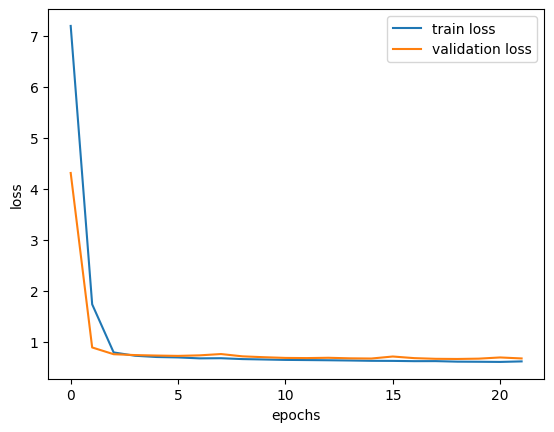

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

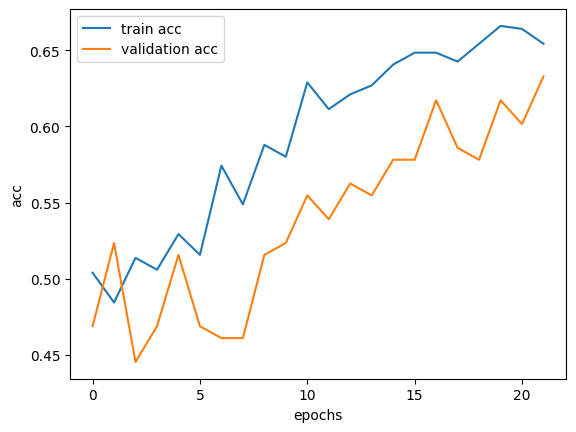

In [12]:
plt.plot(hist.history['acc'], label = 'train acc')
plt.plot(hist.history['val_acc'], label = 'validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

### 집값 데이터 회귀 실습

In [31]:
# 집 값 데이터를 불러옵니다.
df = pd.read_csv("./data/house_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [32]:
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df = df.fillna(df.mean())
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [34]:
df_corr = df.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [35]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending = False)
df_corr_sort

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,...,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,...,-0.022348,0.168368,-0.036522,-0.121102,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,...,-0.044502,0.286290,-0.087089,-0.197458,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,...,-0.041904,0.296671,-0.080601,-0.218665,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MasVnrType_None,0.024897,-0.023867,-0.121677,-0.032418,-0.397955,0.160227,-0.426399,-0.240784,-0.684299,-0.235217,...,0.024834,-0.172209,0.037687,0.132540,0.039705,0.016873,0.013870,-0.010018,0.094590,-0.169202
GarageFinish_Unf,-0.007513,-0.008807,-0.188336,-0.068099,-0.422479,0.203629,-0.523233,-0.414376,-0.222367,-0.179000,...,-0.001712,-0.238934,-0.007466,0.172316,0.039162,-0.017490,0.062021,0.044406,0.118008,-0.232554
BsmtQual_TA,0.033795,-0.138741,-0.066531,-0.044874,-0.497957,0.280779,-0.631734,-0.495485,-0.187406,-0.121785,...,0.018342,-0.265143,-0.010153,0.161940,0.103767,0.005852,-0.050903,0.060591,0.113021,-0.258953
KitchenQual_TA,-0.014973,-0.010836,-0.136764,-0.031154,-0.553891,0.046947,-0.459792,-0.576964,-0.195807,-0.108876,...,-0.012126,-0.274335,0.045067,0.178612,0.065613,0.025849,0.060068,0.034549,0.128151,-0.273826


In [36]:
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [37]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
y = df['SalePrice'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
model = Sequential()
model.add(Dense(10, input_dim = 5, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

early_stopping = EarlyStopping(monitor = 'val_mse', patience = 20, verbose = 1)

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size=20, callbacks=early_stopping)

Epoch 1/200
47/47 [==============================] - 1s 5ms/step - loss: 38352207872.0000 - mse: 38352207872.0000 - val_loss: 36154658816.0000 - val_mse: 36154658816.0000
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 35329036288.0000 - mse: 35329036288.0000 - val_loss: 30462523392.0000 - val_mse: 30462523392.0000
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 24962410496.0000 - mse: 24962410496.0000 - val_loss: 14989009920.0000 - val_mse: 14989009920.0000
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 8161806336.0000 - mse: 8161806336.0000 - val_loss: 1878893440.0000 - val_mse: 1878893440.0000
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 2554472960.0000 - mse: 2554472960.0000 - val_loss: 1365773824.0000 - val_mse: 1365773824.0000
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 2500206080.0000 - mse: 2500206080.0000 - val_loss: 1360375936.0000 - val_mse: 13

In [40]:
y_pred = model.predict(X_test)
y_pred

10/10 [==============================] - 0s 1ms/step


array([[176681.66 ],
       [120199.12 ],
       [191743.9  ],
       [347059.03 ],
       [214208.03 ],
       [130043.16 ],
       [216794.75 ],
       [166413.9  ],
       [146765.   ],
       [149785.33 ],
       [231203.5  ],
       [ 94413.32 ],
       [268983.6  ],
       [211255.4  ],
       [357508.38 ],
       [242961.44 ],
       [162800.84 ],
       [146685.66 ],
       [180557.14 ],
       [213248.06 ],
       [265160.4  ],
       [125490.56 ],
       [161795.44 ],
       [134862.97 ],
       [196942.23 ],
       [203017.88 ],
       [229387.31 ],
       [221924.25 ],
       [133405.72 ],
       [159932.06 ],
       [120193.97 ],
       [252359.1  ],
       [197371.28 ],
       [186723.98 ],
       [203979.   ],
       [159450.72 ],
       [ 71055.32 ],
       [181178.03 ],
       [144347.67 ],
       [213092.38 ],
       [285141.62 ],
       [193602.23 ],
       [269940.84 ],
       [148748.81 ],
       [187563.62 ],
       [202743.66 ],
       [176672.38 ],
       [15731

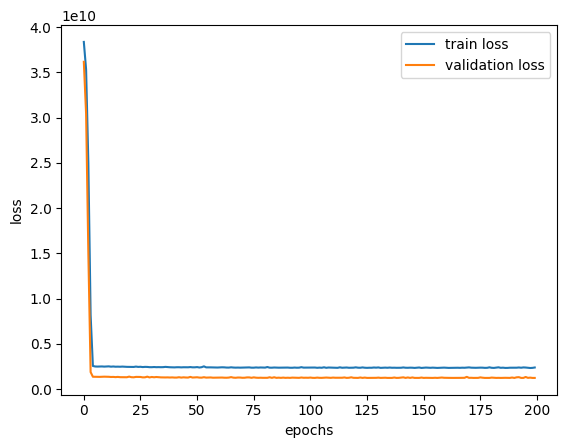

In [41]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [42]:
real_price = []
pred_price = []
result = []

count = 0

for i in range(10):
    real = y_test[i]
    pred = y_pred[i][0]
    print(f'실제 가격 : {real:.2f}, 예측 가격 : {pred:.2f}')
    real_price.append(real)
    pred_price.append(pred)
    count += 1
    result.append(count)

실제 가격 : 153500.00, 예측 가격 : 176681.66
실제 가격 : 109000.00, 예측 가격 : 120199.12
실제 가격 : 148500.00, 예측 가격 : 191743.91
실제 가격 : 501837.00, 예측 가격 : 347059.03
실제 가격 : 225000.00, 예측 가격 : 214208.03
실제 가격 : 125500.00, 예측 가격 : 130043.16
실제 가격 : 205000.00, 예측 가격 : 216794.75
실제 가격 : 174000.00, 예측 가격 : 166413.91
실제 가격 : 125000.00, 예측 가격 : 146765.00
실제 가격 : 125000.00, 예측 가격 : 149785.33


c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) mis

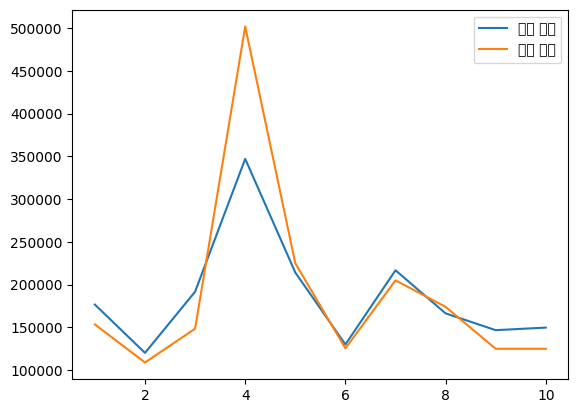

In [43]:
plt.plot(result, pred_price, label = '예측 가격')
plt.plot(result, real_price, label = '실제 가격')
plt.legend()
plt.show()